# Laboratory 3

In this assignment you are going to use two classifiers:
1. DecisionTreeClassifier
2. KNeighborsClassifier

Also you are going to build two distinct methods that will search optimal hyperparameters for your models, and finally you'll get to know trained models evaluation by following metrics:
* Accuracy
* Precision
* Recall
* F1-score

---

# Лабораторная работа №3

В данной работе вы познакомитесь с двумя классификаторами:
1. DecisionTreeClassifier
2. KNeighborsClassifier

Также вы напишите два разных метода, которые будут искать оптимальные гиперпараметры вашей модели, а также вы познакомитесь со следующими метриками для оценки качества обученной модели:
* Accuracy
* Precision
* Recall
* F1-score

## Introduction

---

## Введение

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, classification_report, confusion_matrix, accuracy_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

## Create dataset (Gaussian clouds)

---

## Создание набора данных (гауссовы облака)

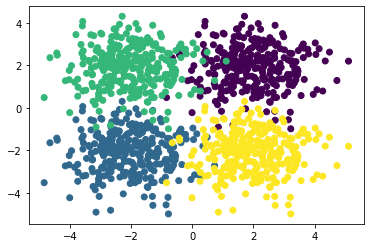

In [2]:
N = 300
noise = np.random.randn(N, 2)
cloud1 = noise + np.array([2, 2])
cloud2 = noise + np.array([-2, -2])
cloud3 = noise + np.array([-2, 2])
cloud4 = noise + np.array([2, -2])

data = np.vstack([cloud1, cloud2, cloud3, cloud4])

annotation1 = [0]*N
annotation2 = [1]*N
annotation3 = [2]*N
annotation4 = [3]*N
annotations = annotation1 + annotation2 + annotation3 + annotation4

plt.scatter(data[:,0], data[:,1], c=annotations)

## Split the dataset

___

## Разделим набор данных

In [3]:
data, annotations = shuffle(data, annotations)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(data, annotations, test_size=0.25)

## Gaussian Naive Classifier

---

## Гауссов классификатор

In [4]:
model = GaussianNB()
model.fit(Xtrain, Ytrain)
pred = model.predict(Xtest)

<AxesSubplot:>

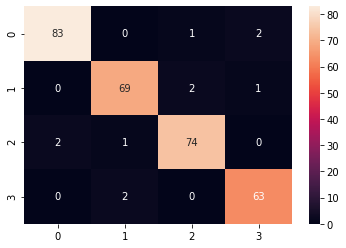

In [5]:
conf_mat = confusion_matrix(Ytest, pred)
sns.heatmap(conf_mat, annot=True)

## Code above just repeats previous laboratory

---

## Код выше просто дублирует предыдущую лабораторную работу

## Metrics

A __false positive error__, or in short a __false positive (FP)__, commonly called a "false alarm", is a result
that indicates a given condition exists, when it does not.
*A false positive error is a type I error.*

A __false negative error__, or in short a __false negative(FN)__, is a test result that indicates that a condition does
not hold, while in fact it does.
*A false negative error is a type II error.*

__True positive (TP)__ - correctly identified.

__False positive (FN)__ - incorrectly identified.

*Example:*

Imagine a study evaluating a new test that screens people for a disease. Each person taking the test either has or does not have the disease. The test outcome can be positive (classifying the person as having the disease) or negative (classifying the person as not having the disease). The test results for each subject may or may not match the subject's actual status. In that setting:

    True positive: Sick people correctly identified as sick
    False positive: Healthy people incorrectly identified as sick
    True negative: Healthy people correctly identified as healthy
    False negative: Sick people incorrectly identified as healthy

---

## Метрики

_Ошибка первого рода_ - __false positive error (FP)__, так же называют "ложная тревога", когда гипотеза принимается, хотя на самом деле она не верна.

_Ошибка второго рода_ - __false negative error (FN)__, так же называют "пропуск цели", когда гипотеза отвергается, хотя на самом деле она верна.


__True positive (TP)__ - Верно принятые гипотезы.

__True negative (TN)__ - Верно отвергнутые гипотезы.

_Например:_

Представим себе исследование, оценивающее новый тест, который диагностирует у человека болезнь. Каждый человек проверяется тестов вне зависимости от того болен он или нет. Результат теста может быть положительным (т.е. человек болен) или отрицательным (человек не болен). Тест  может как верно определять болен человек или нет, так и неверно. В условиях данной ситуации:

    True positive: Больной человек верно идентифицирован как больной
    False positive: Здоровый человек неверно идентифицирован как больной
    True negative: Здоровый человек верно идентифицирован как здоровый
    False negative: Больной человек неверно идентифицирован как здоровый

### Accuracy

It is basically  a ratio of correctly predicted observation in the total observations.

_Carefully study use cases of this metric._

---

Данная метрика ни что иное как отношение верно предсказанных наблюдей к общему числу наблюдений.

_Внимательно изучите случаи, когда эта метрика применима._

$$\large accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

In [6]:
accuracy_score(Ytest, pred)

0.9633333333333334

### Precision, recall and f1-score

Precision measures how well our model recognizes one specific class from others.

Recall or True Posititve Rate (TPR) measures how well our model can find one specific class.

FPR - evaluates a probabilty of an element being incorrectly assigned to the specific class.

F1-score is a harmonic average between precision and recall

---

Precision измеряет насколько хорошо наша модель отличает один класс от других.

_В русской литературе precision очень часто обозначают термином "специфичность" или "точность"_

Recall или TPR измеряет насколько хорошо наша модель может обнаруживать определенный класс.

_В русской литературе recall очень часто обозначают термином "чувствительность" или "полнота"_

FPR - оценивает вероятность неверного отнесения элемента к определенному классу.

F1-score является гармоническим средним между precision и recall.

_В русской литературе F1-score очень часто обозначают термином "f-мера"_

$$\large precision = \frac{TP}{TP + FP}$$
$$\large recall = \large TPR = \frac{TP}{TP + FN}$$
$$\large FPR = \frac{FP}{FP + TN}$$
$$\large \ F = 2 \cdot \frac{precision \cdot recall}{precision + recall}$$

In [7]:
report = classification_report(Ytest, pred)

In [8]:
# (Support - count of data of class in selection)
print(report)

              precision    recall  f1-score   support

           0       0.98      0.97      0.97        86
           1       0.96      0.96      0.96        72
           2       0.96      0.96      0.96        77
           3       0.95      0.97      0.96        65

    accuracy                           0.96       300
   macro avg       0.96      0.96      0.96       300
weighted avg       0.96      0.96      0.96       300



# ROC Curve (Receiver operating characteristic)

__ROC Curve__ is a graph showing the performance of a classification model (binary classifier) at all classification thresholds

In other words a ROC curve plots __TPR vs. FPR__ at different classification thresholds.

---

# ROC-кривая

__ROC-кривая__ это график отображающий качество классификатора для всех значений порога классификации.

Другими слоавми ROC-кривая отображает зависимость __TPR__ от __FPR__ для различных порогов классификации.

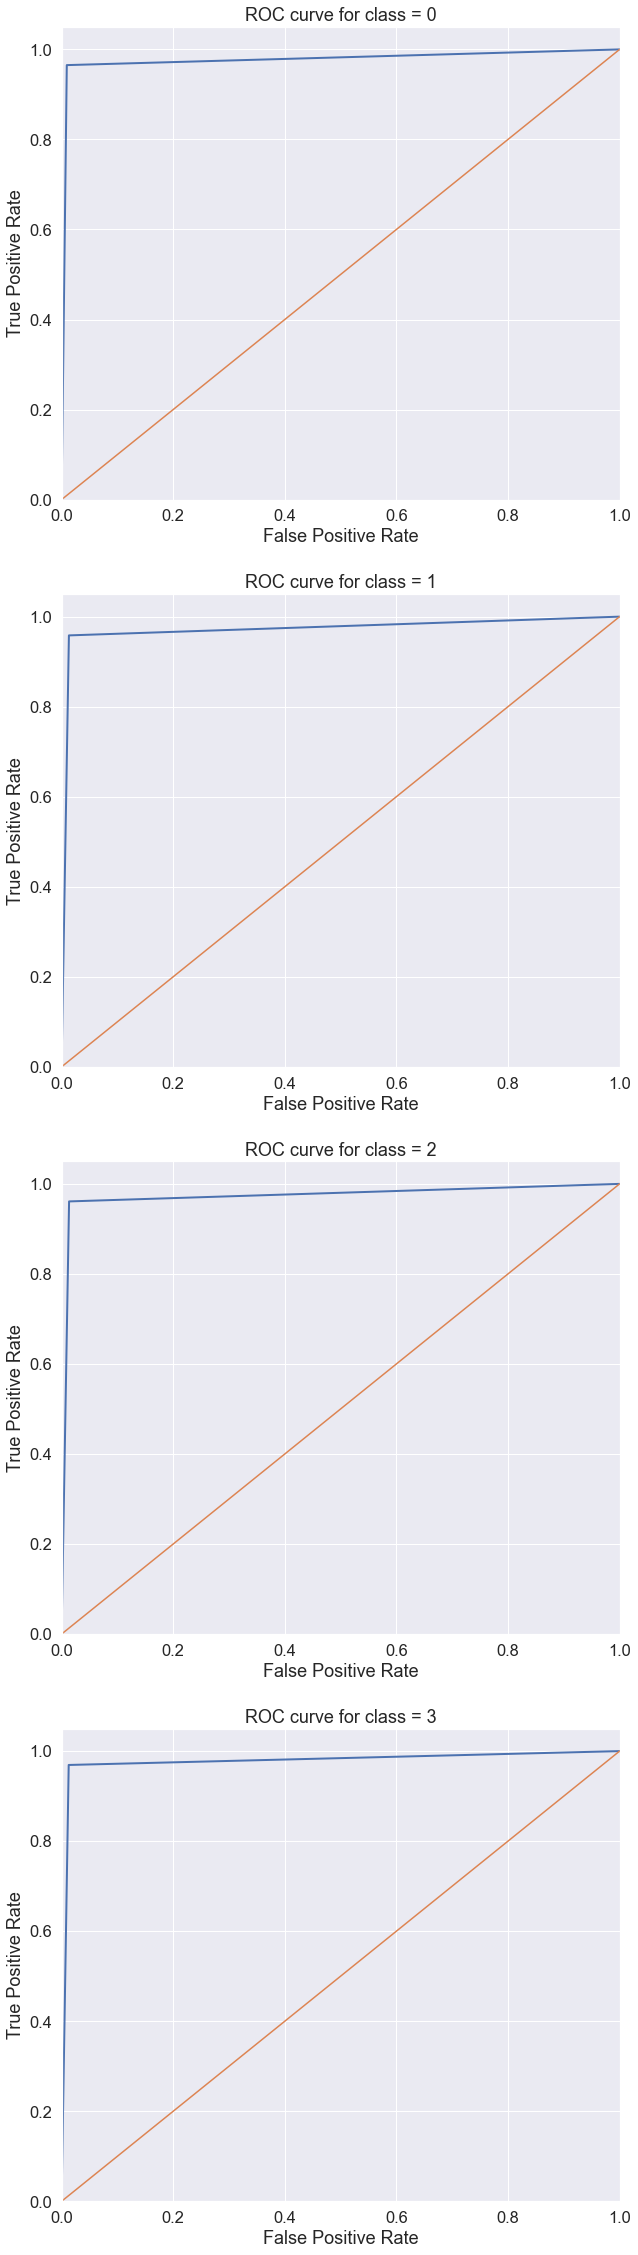

In [9]:
Ytest = np.asarray(Ytest)

sns.set(font_scale=1.5)
sns.set_color_codes("muted")

lw = 2
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(10, 40))
for i in range(4):
    fpr, tpr, thresholds = roc_curve(Ytest == i, pred == i, pos_label=1)
    axs[i].plot(fpr, tpr, lw=lw, label='ROC curve ')
    axs[i].plot([0, 1], [0, 1])
    axs[i].set_xlim([0.0, 1.0])
    axs[i].set_ylim([0.0, 1.05])
    axs[i].set_xlabel('False Positive Rate')
    axs[i].set_ylabel('True Positive Rate')
    axs[i].set_title(f'ROC curve for class = {i}')

plt.show()

## Cross-Validation

It is common to assess our models (Naive Bayse classifier, neural netowrk, etc.) using validation set after training ones (the model). Sometimes it turns out that the initial dataset has small number of samples or has class imbalance (situation when some classes appears significantly rarely among the data samples). Thus splitting the dataset into train and val sets leads one of the following problems:
1. Scarcity of the train data, which leads low model's perfomance on validation data.
2. Scarcity of the validation data, which leads wrong model assessment.

The first problem can be detected while model assessment on the validation data.
The second problem can be detected, for example, with unstable model performance with validation data accross different training cycles.

For correct model assessment in such cases you can use cross-validation.

The most popular method for performing cross-validation is using [__"k-fold cross-validation".__](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold)

Let's study an example of using ```cross_val_score``` and ```cross_validate``` for performnig cross-validation.


---

## Кросс-валидация
Обычно модели оцениваются (будь то Баессовский классификатор, нейронные сети и т.д.) с использованием валидационного набора данных после обучения модели. Часто случается так, что исходный набор данных имеет небольшой размер или распределение его классов несбалансисрованно (например один из классов встречается существенно реже остальных) и его разбиение на тренировочную и валидацинную выборки приведет к одной из двух проблем:
1. Недостаток тренировочных данных, что приведет к низкой точности модели на валидацинном наборе данных.
2. Недостаток валидационных данных, что приведет к неверной оценке точности модели.

Первая проблема выявляется проверкой модели на валидационном наборе данных, а вторая может быть выявлена, например, при нестабильных результатах обучения модели.

Для того чтобы, в таких случаях, оценить модель наиболее корректно можно применить методы кросс-валидации.

Наиболее популярным методом кросс-валидации является метод [__"k-fold cross-validation".__](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold)

Рассмотрим далее использование методов ```cross_val_score``` и ```cross_validate``` для произведения кросс-валидации.

### Reference
https://scikit-learn.org/stable/modules/cross_validation

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.datasets import load_iris

In [11]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [12]:
iris_data['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
iris_data['data'].shape

(150, 4)

In [14]:
model = DecisionTreeClassifier()

The simples way to do cross-validation.

Train the model ```cv``` times (where ```cv``` is a number of folds for [KFold cross-validator](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold)) and see its accuracy different runs.

---

Простейший способ кросс-валидации.

Обучить модель ```cv``` раз (где ```cv``` это количество фолдов для [KFold кросс-валидатора](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold))и проверить ее точность после каждого запуска.

In [15]:
cvs = cross_val_score(model, iris_data['data'], iris_data['target'], cv=8)
cvs

array([1.        , 0.94736842, 1.        , 0.89473684, 0.89473684,
       0.94736842, 1.        , 1.        ])

Cross-validation using different metrics.

Define metrics we are interested in.

---

Кросс-валидаци с использованием разных метрик.

Определим метрики которые нас интересуют.

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [16]:
metrics = ['precision_macro', 'recall_macro', 'f1_macro']

In [17]:
cv = cross_validate(model, data, annotations, scoring=metrics, return_train_score=True)
cv

{'fit_time': array([0.0030005 , 0.00300074, 0.00200009, 0.00199962, 0.00199842]),
 'score_time': array([0.00400019, 0.00299954, 0.00300145, 0.00400019, 0.00199986]),
 'test_precision_macro': array([0.90583528, 0.95535912, 0.91325979, 0.90980314, 0.92159544]),
 'train_precision_macro': array([1., 1., 1., 1., 1.]),
 'test_recall_macro': array([0.90416667, 0.95416667, 0.9125    , 0.90833333, 0.92083333]),
 'train_recall_macro': array([1., 1., 1., 1., 1.]),
 'test_f1_macro': array([0.90457798, 0.954277  , 0.9123418 , 0.90805595, 0.92067572]),
 'train_f1_macro': array([1., 1., 1., 1., 1.])}

## Hyperparameters Tuning

Hyperparameters are the parameters that are not learned during training process but chosen by an machine learning engineer. An example of hyperparamer can be depth of a decision tree, number of neurons in a neural network etc. Optimal hyperparameters vary from model to model, dataset to dataset and finding ones that suits your case the best is not an easy task.

There are several ways to search for the optimal hyperparameters, let's study only two of them:
1. Grid search - does an exhaustive search in a space of the hyperparameters you're interested in. In other words - train model with all possible combinations and choose the best one.
2. Random search. Instead of passing in all hyperparameters' values to try, you pass in the distribution of the parameters, and additional parameter which defines number of search iterations.

---

## Подбор гиперпараметров
Гиперпараметры - это такие параметры, которые не изменяются во время процесса обучание и выбираются самим специалистом по машинному обучению. Пример гиперпараметров: глубина дерева решений, число нейронов в нейронной сети, и т.д. Набор оптимальных гиперпараметров может варьироваться в зависимости от выбранной модели, набора данных. Поиск наилучшего набора гиперпараметров для решения определенной проблемы - нетривиальная задча.

Сущестует несколько способов поиска оптимальных параметров, рассмотрим пару из них:
1. Grid search - производит полный перебор в интересующем нас пространстве гиперпараметров. Другими словами - обучает модель со всеми возможными комбинациями параметров и выбирает наилучшую.
2. Random search. Вместо того чтобы перечислять параметры которые необходимо протестировать, мы задаем распределение этих параметров и количество итераций поиска.

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [19]:
model = DecisionTreeClassifier()

max_depth = [3, 4, 5, 6, 7]
max_leaf_nodes = [2, 3, 4, 5]
criterion = ['gini', 'entropy']
parameters = {
    'max_depth': max_depth,
    'max_leaf_nodes': max_leaf_nodes,
    'criterion': criterion
}

g_search = GridSearchCV(
    estimator=model,
    param_grid=parameters
)

_ = g_search.fit(iris_data['data'], iris_data['target'])
print('Results:', g_search.best_params_ )

Results: {'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 5}


In [20]:
model = DecisionTreeClassifier()

max_depth_distr = (3, 7)
max_leaf_nodes_distr = (2, 5)
criterion = ['gini', 'entropy']
parameters = {
    'max_depth': max_depth_distr,
    'max_leaf_nodes': max_leaf_nodes_distr,
    'criterion': criterion
}

g_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=parameters,
    n_iter=4
)

_ = g_search.fit(iris_data['data'], iris_data['target'])
print('Results:', g_search.best_params_ )

Results: {'max_leaf_nodes': 5, 'max_depth': 3, 'criterion': 'gini'}


## Assignment

Develop your own implementations of Grid Search and Random Search. This methods should find model's hyperparameters which satisfy __minimum error value__ requirement from the variant. Use the data obtained in the first lab to train the classifiers. Type of the error is defined by the variant:

* Even variant - find such parameters for the models, so that they minimize type 1 error.
* Odd variant - find such parameters for the models, so that they minimize type 2 error.

### Upon the completion of the assignement the following must be done

1. List of hyperparameters values for _KNeighborsClassifier_ and _DecisionTreeClassifier_ classifiers.
2. Table containing f1-score, precision and recall for each class, obtained using optimal hyperparameters.
3. Consider pros and cons of using hyperparameters search methods.

---

Разработать собственную реализацию методов Grid Search и Random Search. Данные методы должны находить гиперпараметры модели, которые обеспечивают минимальное значение ошибки согласно варианту. Использовать наборы данных, полученные при выполнении лабораторной работы №1. Вид ошибки определяется в зависимости от варианта:

* Чётный номер варианта – ошибка первого рода
* Нечётный номер вариант – ошибка второго рода.

### Результаты, которые необходимо получить в итоге:

1. Значения гиперпараметров классификаторов (_KNeighborsClassifier_ и _DecisionTreeClassifier_).
2. Таблицу, содержащую значения F-меры, точности и полноты для каждого класса при использовании оптимальных значений параметров классификации.
3. Выводы о плюсах и минусах используемых методов поиска оптимальных параметров.
